In [9]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
img_ = cv2.imread('route_z_0_0.png')
#img_ = cv2.imread('original_image_left.jpg')
#img_ = cv2.resize(img_, (0,0), fx=1, fy=1)
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
img = cv2.imread('route_z_0_1.png')
#img = cv2.imread('original_image_right.jpg')
#img = cv2.resize(img, (0,0), fx=1, fy=1)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()

In [13]:
# find key points
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
#plt.imshow('original_image_left_keypoints',cv2.drawKeypoints(img_,kp1,None))

[]

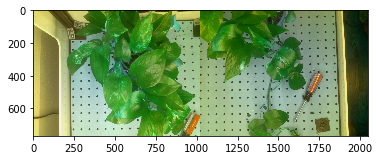

In [16]:
#FLANN_INDEX_KDTREE = 0
#index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
#search_params = dict(checks = 50)
#match = cv2.FlannBasedMatcher(index_params, search_params)
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.03*n.distance:
        good.append(m)
draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)
img3 = cv2.drawMatches(img_,kp1,img,kp2,good,None,**draw_params)
plt.imshow(img3)
good


In [15]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    #cv2.imshow("original_image_overlapping.jpg", img2)
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))
dst = cv2.warpPerspective(img_,M,(img.shape[1] + img_.shape[1], img.shape[0]))
dst[0:img.shape[0],0:img.shape[1]] = img
cv2.imshow("original_image_stitched.jpg", dst)
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop top
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop top
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    #crop top
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame
cv2.imshow("original_image_stitched_crop.jpg", trim(dst))
#cv2.imsave("original_image_stitched_crop.jpg", trim(dst))

Not enought matches are found - %d/%d 0.0


NameError: name 'M' is not defined